# Project Report : Bank Customer Churn Analysis

# 1.INTRODUCTION

This project aims to predict whether a bank customer will churn (leave the bank) or stay, using historical customer data and machine learning techniques. The dataset contains features such as customer_id, credit_score, country, gender, age, tenure, balance, number of products, credit card status, active member status, estimated salary, and a churn label indicating if the customer left or not. By learning patterns from these attributes, the model helps the bank identify high‑risk customers in advance, so that targeted retention strategies and personalized services can be applied to reduce customer loss and improve long‑term profitability.


# Key Questions Addressed

1.Which customers are likely to churn based on their historical data and profile attributes?

   
2.How do factors like credit_score, age, tenure, balance, and number of products influence the probability of churn?
​

3.What is the relationship between customer demographics (country, gender, age) and churn behavior?

​
4.How effectively can a machine learning model predict customer churn compared to a baseline or random guess?

​
5.How can the churn predictions be used to design targeted retention strategies to reduce customer loss and increase profitability?

​
#  Technologies Used:


* Python: Pandas, NumPy, Matplotlib, Seaborn

* Jupyter Notebook: For interactive analysis, visualization, and detailed reporting


​

# Dataset overview
The dataset contains bank customer records with multiple demographic and account‑related attributes used for churn prediction.
​Each row represents one unique customer, and each column captures a specific characteristic or outcome related to that customer.

# Columns in the dataset
* `customer_id`: Unique identifier for each customer.

* `credit_score`: Numerical credit score of the customer.

* `country`: Country of residence (e.g., France, Spain, Germany).

* `gender`: Gender of the customer (Male/Female).

* `age`: Age of the customer in years.

* `tenure`: Number of years the customer has been with the bank.

* `balance`: Account balance of the customer.

* `products_number`: Number of bank products the customer holds.

* `credit_card`: Indicates whether the customer has a credit card (1 = yes, 0 = no).

* `active_member`: Indicates whether the customer is an active member (1 = active, 0 = inactive).

* `estimated_salary`: Estimated annual salary of the customer.

* `churn`: Target label indicating if the customer left the bank (1 = churned, 0 = not churned).



# Data Loading & Initial Inspection:


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


In [ ]:
# Set display option to show all columns in one line
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap DataFrame across lines
pd.set_option('display.width', 1000)           # Set high width limit to prevent line breaks
pd.set_option('display.max_colwidth', None)    # Show full column content

In [3]:
# Load the dataset
df = pd.read_csv("D:\project da\Bank Customer Churn Prediction.csv")
print("Dataset loaded successfully!\n")


Dataset loaded successfully!



In [4]:
# Show basic information
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean 

In [5]:
print("\n--- First 5 Rows ---\n")
# print(df.head(5).to_string(index=False))
df.head()


--- First 5 Rows ---



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print("\n--- Descriptive Statistics ---\n")
# print(df.describe().to_string(index=False))
df.describe()


--- Descriptive Statistics ---



,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print("\n--- Descriptive Statistics ---\n")
# print(df.describe().to_string(index=False))
df.describe(include='object')


--- Descriptive Statistics ---



,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# Data Cleaning & Preprocessing Steps

In [8]:
initial_rows = df.shape[0]
print(f"Intial Rows In DataFrame {initial_rows}")
df.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_rows - df.shape[0]} duplicate rows.")

Intial Rows In DataFrame 10000

Removed 0 duplicate rows.


In [11]:
print("\nFinal DataFrame shape after all cleaning and feature engineering:", df.shape)  


Final DataFrame shape after all cleaning and feature engineering: (10000, 12)


# Exploratory Data Analysis (EDA) & Visualization
## Objective 1: Customer Churn Overview
# Count of Churned vs. Non‑Churned Customers¶

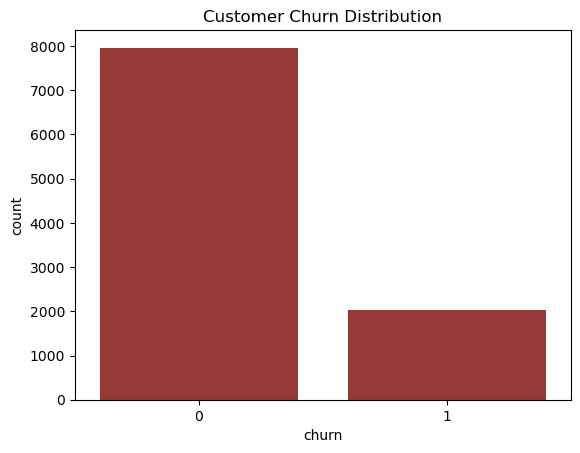

In [13]:
# Objective 1: Customer Churn Overview
# Bar chart
sns.countplot(x='churn', data=df,color='brown')
plt.title('Customer Churn Distribution')
plt.show()

# Distribution of Customer Churn vs. Retention

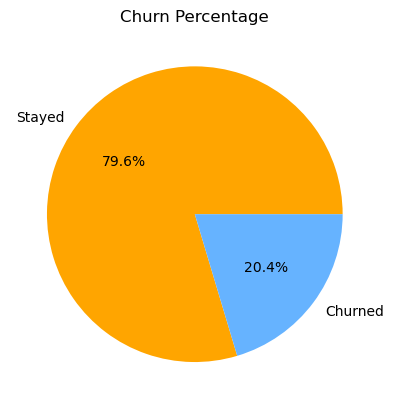

In [15]:
# Pie chart
churn_counts = df['churn'].value_counts()
plt.pie(churn_counts, labels=['Stayed', 'Churned'], autopct='%1.1f%%',colors=['orange','#66b3ff'])
plt.title('Churn Percentage')
plt.show()

# Objective 2: Demographic Impact
# Customer Churn Distribution by Gender¶

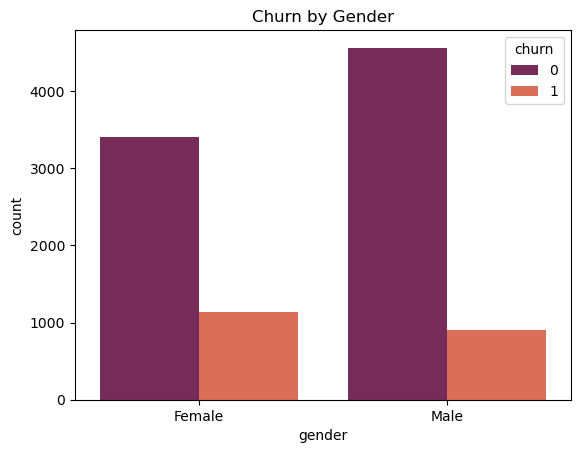

In [19]:

sns.countplot(x='gender', hue='churn', data=df,palette='rocket')
plt.title('Churn by Gender')
plt.show()


# Customer Churn Distribution by Country¶

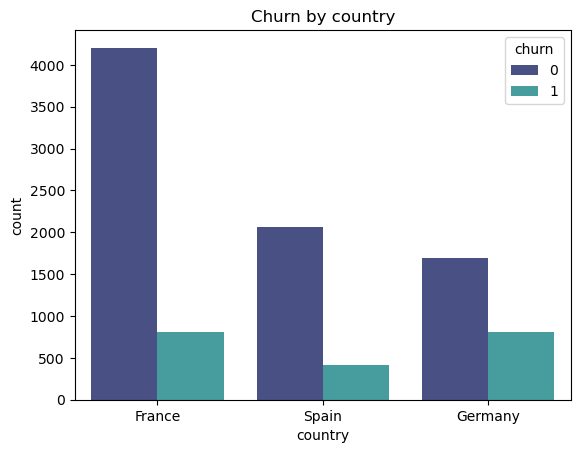

In [24]:
sns.countplot(x='country', hue='churn', data=df,palette='mako')
plt.title('Churn by country')
plt.show()

# Customer Churn Distribution by Country¶

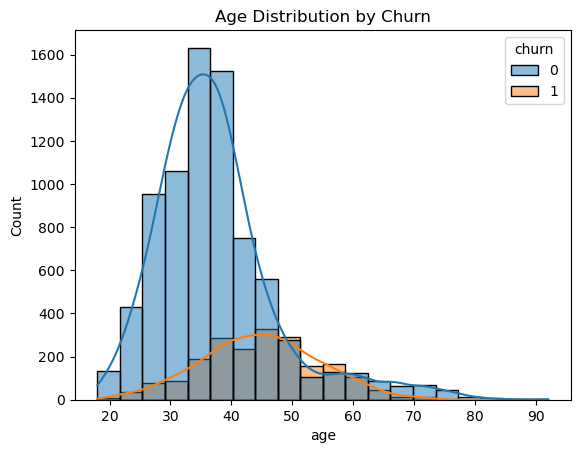

In [28]:

sns.histplot(data=df, x='age', hue='churn', bins=20, kde=True)
plt.title('Age Distribution by Churn')
plt.show()


# Objective 3: Customer Behavior
# Tenure Distribution for Churned vs. Non‑Churned Customers¶

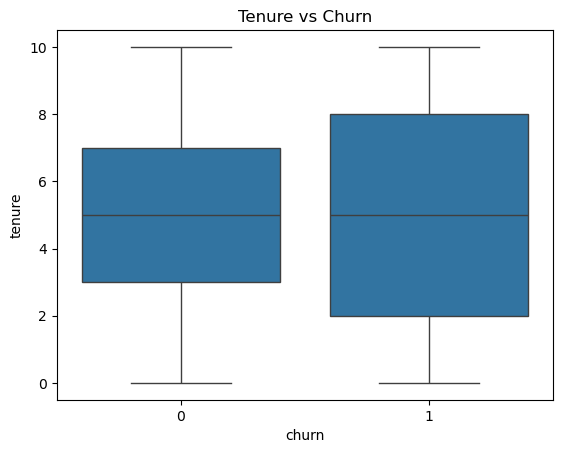

In [31]:
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

 # Customer Churn Distribution by Number of Products


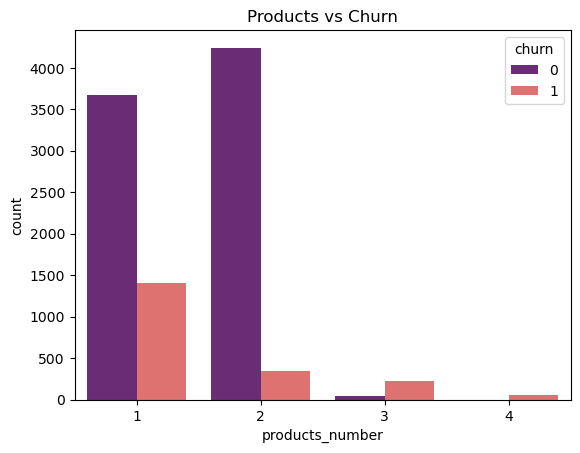

In [36]:
sns.countplot(x='products_number', hue='churn', data=df,palette='magma')
plt.title('Products vs Churn')
plt.show()


# Customer Churn Distribution by Active Membership Status


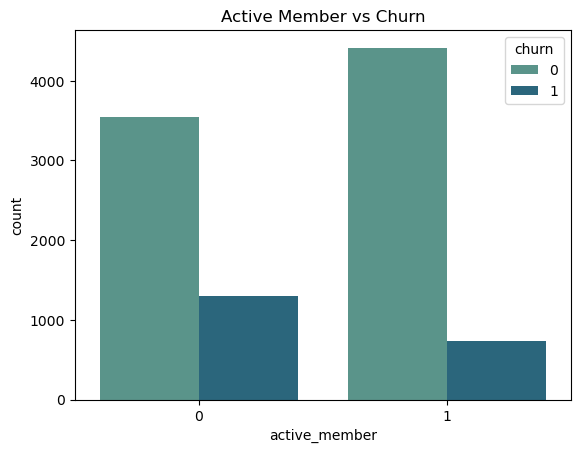

In [40]:
sns.countplot(x='active_member', hue='churn', data=df,palette='crest')
plt.title('Active Member vs Churn')
plt.show()

# Objective 4: Financial Fact
# Credit Score Distribution for Churned vs. Non‑Churned Customers


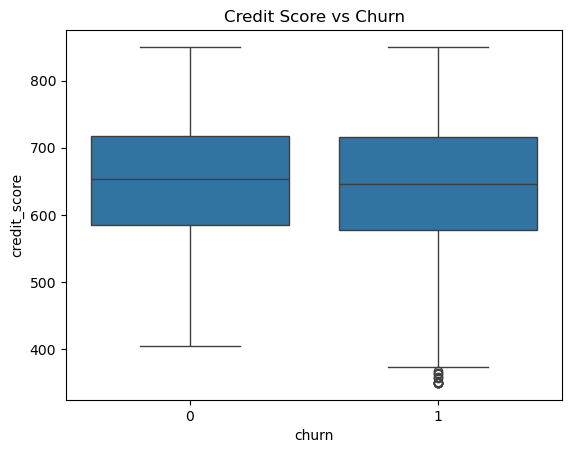

In [44]:
sns.boxplot(x='churn', y='credit_score', data=df)
plt.title('Credit Score vs Churn')
plt.show()


# Account Balance Distribution for Churned vs. Non‑Churned Customers


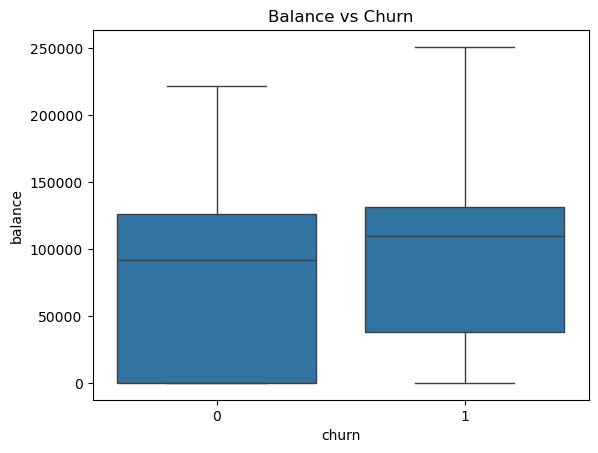

In [47]:
sns.boxplot(x='churn', y='balance', data=df)
plt.title('Balance vs Churn')
plt.show()


# Estimated Salary Distribution for Churned vs. Non‑Churned Customers


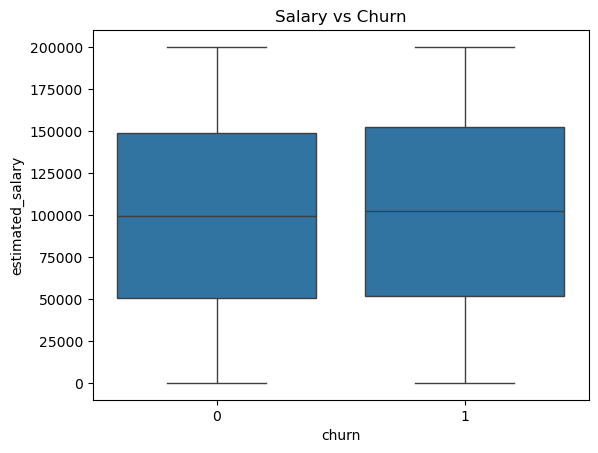

In [50]:
sns.boxplot(x='churn', y='estimated_salary', data=df)
plt.title('Salary vs Churn')
plt.show()


# Correlation Heatmap of Numerical Features and Churn


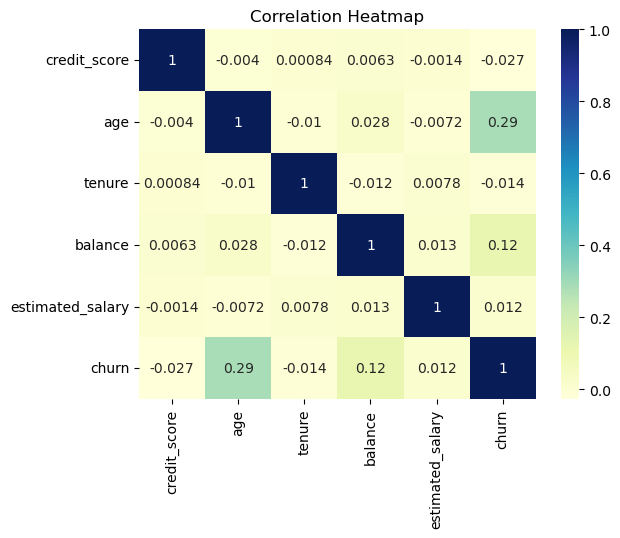

In [52]:
corr = df[['credit_score', 'age', 'tenure', 'balance', 'estimated_salary', 'churn']].corr()
sns.heatmap(corr, annot=True,cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


# Pearson Correlation Between Credit Score and Churn

In [55]:
corr_val, _ = pearsonr(df['credit_score'], df['churn'])
print(f"Correlation between Credit Score and Churn: {corr_val:.2f}")

Correlation between Credit Score and Churn: -0.03


# Key insights and recommendations
### * Understand and target high‑risk segments
* Insight: Churn is not uniformly distributed; it varies with features such as age, tenure, balance, number of products, active_member status, and country, indicating specific customer segments are more likely to leave.

* Recommendation: Segment customers based on these key drivers (e.g., mid‑age, high balance, multiple products, low tenure) and design tailored retention campaigns, such as proactive relationship calls, fee waivers, or personalized offers.

### * Leverage engagement and product holding
* `Insight`: Active members and customers with more products generally show different churn behavior compared to inactive or low‑product customers, suggesting engagement level is an important churn predictor.

* `Recommendation`: Encourage customers to become active members and adopt additional relevant products through bundled offers, rewards, or educational campaigns that clearly communicate product benefits and value.

### * Monitor financial health indicators
* `Insight`: Features like credit_score, balance, and estimated_salary have measurable relationships with churn, reflecting a link between financial profile and the likelihood of leaving the bank.

* `Recommendation`: Set up early‑warning rules in the model pipeline to flag customers whose financial indicators change sharply (e.g., sudden drop in balance or score) and route them to retention or advisory teams for timely intervention.

### * Use model outputs to drive retention strategy
* `Insight`: The machine learning model can predict churn probability for each customer by learning patterns across all key features, which is more effective than simple rule‑based approaches.

* `Recommendation`: Integrate the churn prediction scores into the bank’s CRM system to prioritize outreach, schedule follow‑ups for high‑risk customers, and measure the impact of retention campaigns over time.

### * Continuously refine the model and data
* `Insight`: Model performance and feature importance may change as customer behavior, market conditions, or product offerings evolve.

* `Recommendation`: Regularly retrain and evaluate the model with fresh data, add new behavioral or transactional features where possible, and compare multiple algorithms to ensure robust, up‑to‑date churn prediction capability.
# Conclusion
This Bank Customer Churn Prediction project successfully transformed raw customer records into actionable intelligence for retention. By combining careful data preprocessing, exploratory data analysis, and predictive modeling, the analysis uncovered critical factors influencing churn and provided a practical basis for targeted interventions that can strengthen customer relationships and protect long‑term profitability for the bank.